# Dataset Balancing using pandas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.utils import shuffle
path = "./dataJoe/"

In [2]:
# df =pd.read_csv(path+'dataset.csv')
# classG = df[df['class'] == 'g']
# classH = df[df['class'] == 'h']
# countG, countH = df['class'].value_counts()

In [3]:
# classGUnder = classG.sample(countH)
# newDataset = pd.concat([classGUnder, classH],axis=0)
# newDataset.to_csv(path+'balanced_dataset.csv',index=False)

# Reading Data without recreating it each time

<AxesSubplot: >

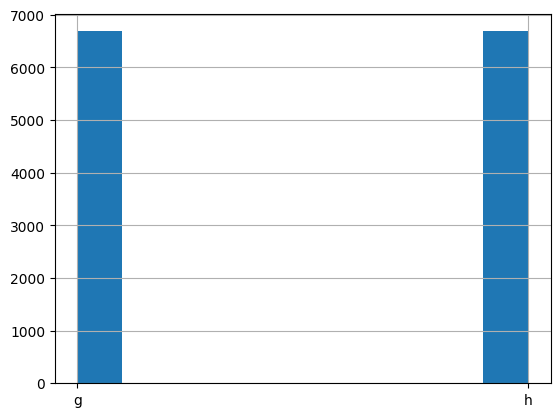

In [2]:
newDataset = pd.read_csv(path+'balanced_dataset.csv')
newDataset['class'].hist()

# Data Split

In [3]:
x= newDataset.drop('class',axis=1) # 1 for column, 0 for index
y= newDataset['class']

In [4]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3)

# Importing the models

In [5]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree

In [8]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.79      0.78      0.79      1979
           h       0.79      0.80      0.80      2034

    accuracy                           0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013



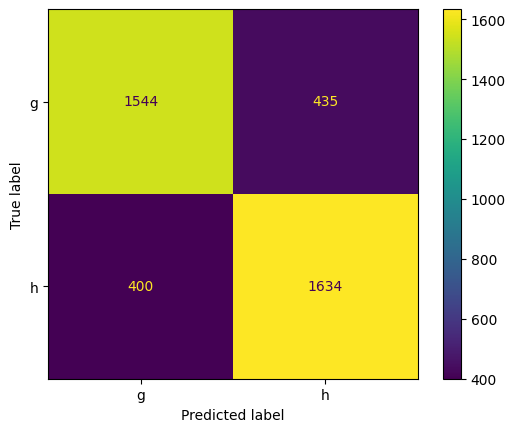

In [10]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

In [11]:
#tree.plot_tree(model)
#plt.show()

# AdaBoost

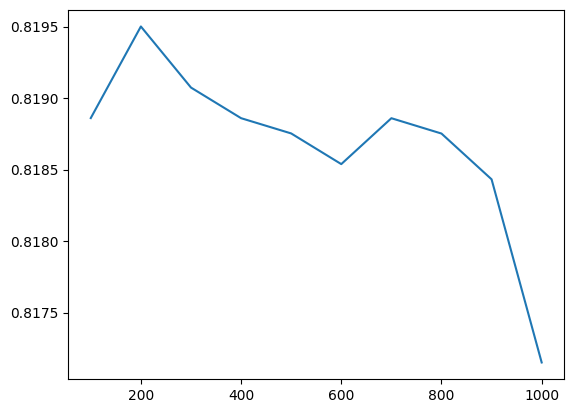

In [25]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
greatestScore = 0 
greatestN = 0
scores = []
for n in n_estimators:
    model = AdaBoostClassifier(n_estimators=n)
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestN = n
plt.plot(n_estimators,scores)
plt.show()

In [26]:
greatestN

200

              precision    recall  f1-score   support

           g       0.82      0.82      0.82      1979
           h       0.82      0.83      0.83      2034

    accuracy                           0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013



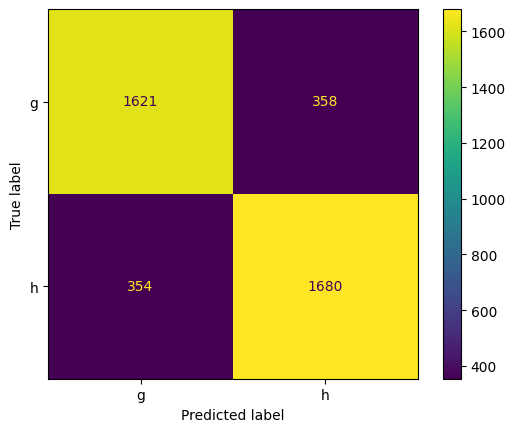

In [27]:

model = AdaBoostClassifier(n_estimators=greatestN)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show() 

# KNN

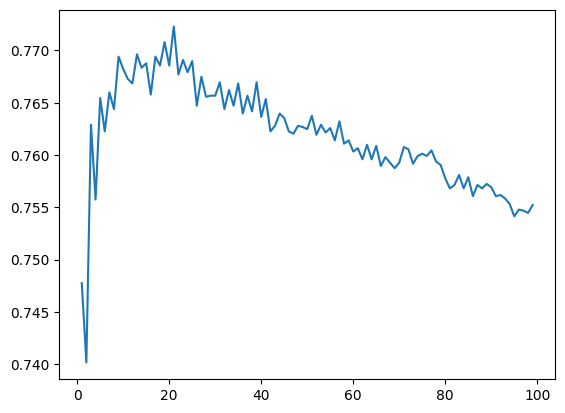

In [13]:
greatestScore = 0
greatestK = 0
scores = []
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    # scores = cross_validate(model, x_train, y_train, cv=10,scoring='accuracy')
    # score = scores['test_score'].mean()
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestK = k
plt.plot(range(1,100),scores)
plt.show()

In [14]:
greatestK

21

In [15]:
model = KNeighborsClassifier(n_neighbors=greatestK)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.73      0.86      0.79      1979
           h       0.83      0.69      0.75      2034

    accuracy                           0.77      4013
   macro avg       0.78      0.77      0.77      4013
weighted avg       0.78      0.77      0.77      4013



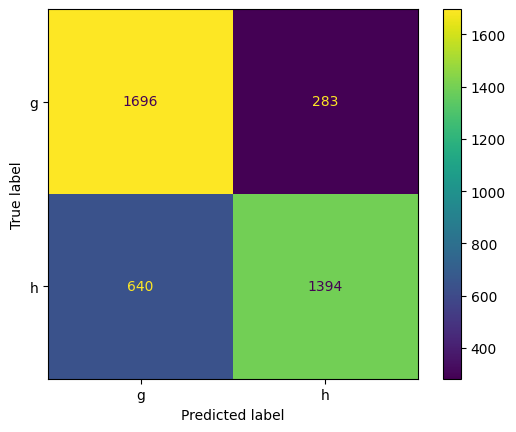

In [17]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Random Forest

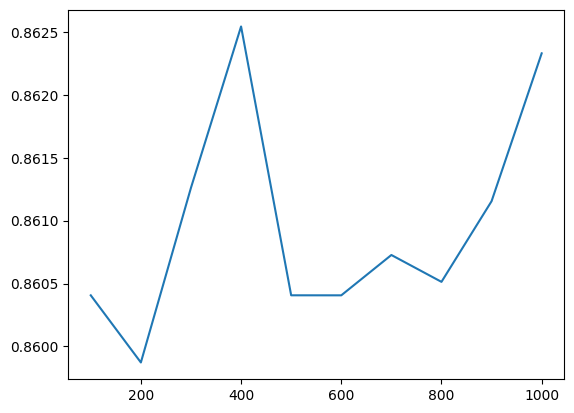

In [18]:
#estimate the best n_estimators for random forest
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
greatestScore = 0
greatestN = 0
scores = []
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n)
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestN = n
plt.plot(n_estimators,scores)
plt.show()


In [19]:
model = RandomForestClassifier(n_estimators=greatestN)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.85      0.88      0.87      1979
           h       0.88      0.85      0.87      2034

    accuracy                           0.87      4013
   macro avg       0.87      0.87      0.87      4013
weighted avg       0.87      0.87      0.87      4013



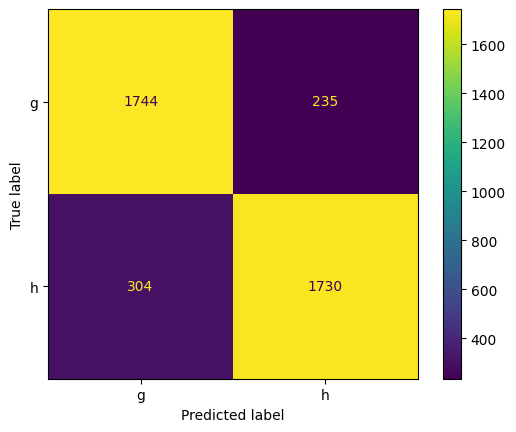

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Naive Bayes

In [6]:
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.60      0.89      0.72      2000
           h       0.79      0.41      0.54      2013

    accuracy                           0.65      4013
   macro avg       0.69      0.65      0.63      4013
weighted avg       0.69      0.65      0.63      4013



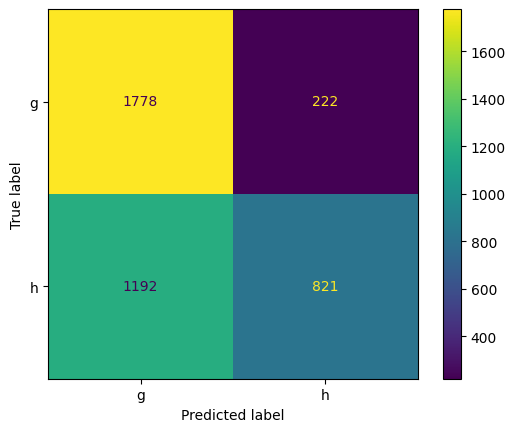

In [8]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Neural Network using Pytorch

In [20]:
#use gpu if available
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
#build a neural network
class Net(nn.Module):
    def __init__(self, hiddenSize1,hiddenSize2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, hiddenSize1)
        self.fc2 = nn.Linear(hiddenSize1, hiddenSize2)
        self.fc3 = nn.Linear(hiddenSize2, 2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def getAccuracy(self,dataset):
        with torch.no_grad():
            correct = 0
            total = 0
            for x,y in dataset:
                x,y = x.to(device),y.to(device)
                output = self(x.float())
                for idx, i in enumerate(output):
                    if torch.argmax(i) == y[idx]:
                        correct += 1
                    total += 1
            return correct/total
    def trainOneEpoch(trainDataset, optimizer, criterion):
        for data in trainDataset:
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

In [22]:
train = []
test = []
#conver y_train to zeros and ones
y_train = y_train.replace('g',0)
y_train = y_train.replace('h',1)
y_test = y_test.replace('g',0)
y_test = y_test.replace('h',1)

for i in range(len(x_train)):
    train.append([x_train.iloc[i].values,y_train.iloc[i]])

for i in range(len(x_test)):
    test.append([x_test.iloc[i].values,y_test.iloc[i]])

trainDataSet = torch.utils.data.DataLoader(train, batch_size=512)
testDataSet = torch.utils.data.DataLoader(test, batch_size=512)
x_train_torch = torch.tensor(x_train.values,device=device)
y_train_torch = torch.tensor(y_train.values,device=device)
x_test_torch = torch.tensor(x_test.values,device=device)
y_test_torch = torch.tensor(y_test.values,device=device)

In [ ]:
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()
kfold = KFold(n_splits=10)
averageValidationAccuracy = []
#loop through different hidden layer sizes
hiddenLayer1 = [10,30,50,70,90]
hiddenLayer2 = [10,30,50,70,90]

for i,n1 in enumerate(hiddenLayer1):
    averageValidationAccuracy.append([])
    for j,n2 in enumerate(hiddenLayer2):
        kfoldAccuracy = 0

        for train_index, test_index in kfold.split(x_train,y_train):
            x_train_fold = x_train_torch[train_index]
            y_train_fold = y_train_torch[train_index]
            x_test_fold = x_train_torch[test_index]
            y_test_fold = y_train_torch[test_index]

            train = torch.utils.data.TensorDataset(x_train_fold, y_train_fold)
            test = torch.utils.data.TensorDataset(x_test_fold, y_test_fold)
            train_loader = torch.utils.data.DataLoader(train, batch_size = 512)
            test_loader = torch.utils.data.DataLoader(test, batch_size = 512)

            model = Net(n1, n2)
            model.to(device)
            optimizer = optim.Adam(model.parameters(), lr=0.01)
            
            
            for epoch in range(100):
                model.trainOneEpoch(train_loader, optimizer, criterion)
            kfoldAccuracy += model.getAccuracy(test_loader)

        kfoldAccuracy = kfoldAccuracy/10
        averageValidationAccuracy[i].append(kfoldAccuracy) 
        print(n1,n2)
        print(averageValidationAccuracy[i][j])

In [15]:
#iterate through the average validation accuracy and find the best hidden layer size
bestAccuracy = 0
bestHiddenLayer1 = 0
bestHiddenLayer2 = 0
bestAccuracy = 0
scores = []
for i,n1 in enumerate(hiddenLayer1):
    for j,n2 in enumerate(hiddenLayer2):
        model = Net(n1, n2)
        model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.01)
        accuracyBeforeOverfitting = 0
        for epoch in range(1000):
            for inputs, labels in trainDataSet:
                model.trainOneEpoch(trainDataSet, optimizer, criterion)
                
            modelAccuracy = model.getAccuracy(trainDataSet)
            if(modelAccuracy- averageValidationAccuracy[i][j] > 0.05):
                break

            accuracyBeforeOverfitting = modelAccuracy
            #save the model
            if modelAccuracy > bestAccuracy:
                bestAccuracy = modelAccuracy
                torch.save(model, "model.pt")
                bestHiddenLayer1 = n1
                bestHiddenLayer2 = n2
        scores.append(accuracyBeforeOverfitting)

In [24]:
y_pred = []
y_actual = []
#load the model
bestModel = torch.load("model.pt")
bestModel.to("cpu")
with torch.no_grad():
    for input,labels in testDataSet:
        outputs = bestModel(input.float())
        #get the predicted class
        for i in outputs:
            y_pred.append(torch.argmax(i))
        #get the actual class
        for i in labels:
            y_actual.append(i)

In [41]:
print(bestHiddenLayer1,bestHiddenLayer2)

50 90


In [25]:
print(classification_report(y_actual,y_pred, target_names=['g','h']))

              precision    recall  f1-score   support

           g       0.83      0.89      0.86      1996
           h       0.88      0.82      0.85      2017

    accuracy                           0.85      4013
   macro avg       0.86      0.85      0.85      4013
weighted avg       0.86      0.85      0.85      4013



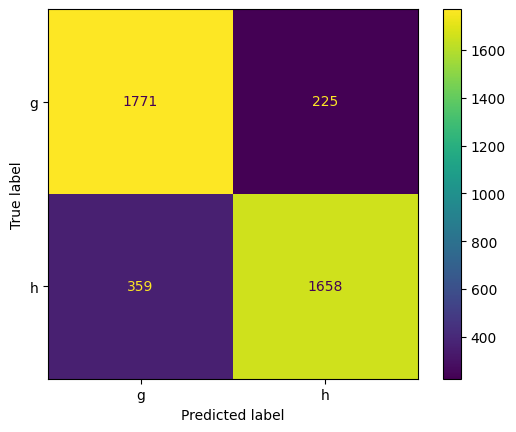

In [26]:
ConfusionMatrixDisplay(confusion_matrix(y_actual,y_pred),display_labels=['g','h']).plot()
plt.show()

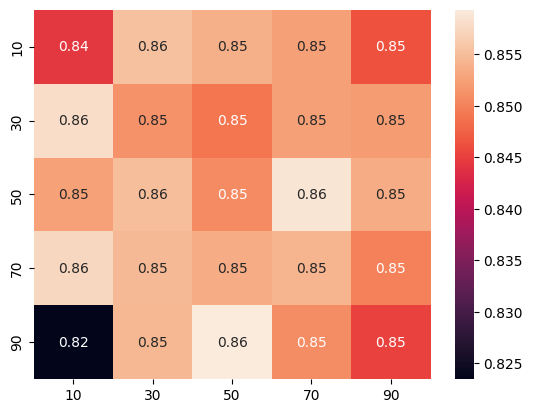

In [36]:
#heatmap for n1 and n2
import seaborn as sns
import pandas as pd
df = pd.DataFrame(np.array(scores).reshape(5,5))
sns.heatmap(df,annot=True,xticklabels=hiddenLayer1,yticklabels=hiddenLayer2)
plt.show()

# Final Thoughts

## Comparison

<table align="center">
    <tr>
        <th>Algorithm</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>Average F1</th>
    </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.79</td>
    <td>0.79</td>
    <td>0.79</td>
    <td>0.79</td>
  </tr>
  <tr>
    <td>AdaBoost</td>
    <td>0.82</td>
    <td>0.82</td>
    <td>0.82</td>
    <td>0.82</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>0.77</td>
    <td>0.78</td>
    <td>0.77</td>
    <td>0.77</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.87</td>
    <td>0.87</td>
    <td>0.87</td>
    <td>0.87</td>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>0.65</td>
    <td>0.69</td>
    <td>0.65</td>
    <td>0.63</td>
  </tr>
  <tr>
    <td>Neural Network</td>
    <td>0.85</td>
    <td>0.86</td>
    <td>0.85</td>
    <td>0.85</td>
  </tr>
</table>

## Which Classification Algorithm is Better?


- Random Forest gives the best performance. However, with some extra hidden layers and more tuning to the neural network, it can outperform the Random forest

## Algorithms Ranking 

1- Random Forest

2- Neural Network

3- AdaBoost

4- Decision Tree

5- K Nearest Neighbor

6- Naive Bayes

## Decision Tree
- We notice that the precision and recall are nearly the same which means that the algorithm doesn't have a bias toward any of the output classes.

## AdaBoost
- From the graph of n-estimators vs accuracy, we can see that the accuracy is highest when n-estimators = 200.

- We notice that the precision and recall are nearly the same which means that the algorithm doesn't have a bias toward any of the output classes.

## K-Nearest Neighbour
- From the graph of K with respect to accuracy, we notice that at K = 21, this gives the best performance.

## Random Forest 

- From the graph of n-estimators vs accuracy, we can see that the accuracy is highest when n-estimators = 400.

- We notice that the precision and recall are nearly the same which means that the algorithm doesn't have a bias toward any of the output classes.

## Naive Bayes
- Naive Bayes has the lowest accuracy among all the oher classifiers models

- The reason behind that is that the features inside the dataset is related. However the Naive Bayes ignores that and treat each feature as they are independent from each other

- We notice that the algorithm tends to favour the 'g' class. So the algorithm is somewhat biased. The reason behind that is the a lot of data which is labeled 'g' have a nearly equal values for the attributes.

## Neural Network

- The neural network performs fine in the dataset but it can be further improved by adding extra hidden layers. However, training the network would take tremendous amount of time if we do so, so there is a tradeoff to be made here.

# Contributers
1- [Yousef Kotp](https://github.com/yousefkotp)

2- [Adham Mohammed](https://github.com/adhammohamed1)

3- [Mohammed Farid](https://github.com/MohamedFarid612)